# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [ ]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('/content/corpus.pkl')
data

,transcript,full_name
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
chris,Ladies and gentlemen… live from the world-famo...,Chris Rock
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hannah,The following is the transcript of Hannah Gadb...,Hannah Gadbsy
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney
kathleen,[chattering] [man] Whoo! [chattering] [woman] ...,Kathleen Madigan
kevin,[heartbeat] [indistinct chatter] [atmospheric ...,Kevin Hart
pete,♪ Old lady on my case again ♪ ♪ Told me straig...,Pete Davidson


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.056806,0.560134
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.015214,0.538279
chris,Ladies and gentlemen… live from the world-famo...,Chris Rock,-0.057830,0.534200
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.004118,0.514873
hannah,The following is the transcript of Hannah Gadb...,Hannah Gadbsy,0.065228,0.550855
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.039042,0.547935
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.081169,0.484393
kathleen,[chattering] [man] Whoo! [chattering] [woman] ...,Kathleen Madigan,0.030582,0.491006
kevin,[heartbeat] [indistinct chatter] [atmospheric ...,Kevin Hart,-0.004271,0.532305
pete,♪ Old lady on my case again ♪ ♪ Told me straig...,Pete Davidson,0.071222,0.532426


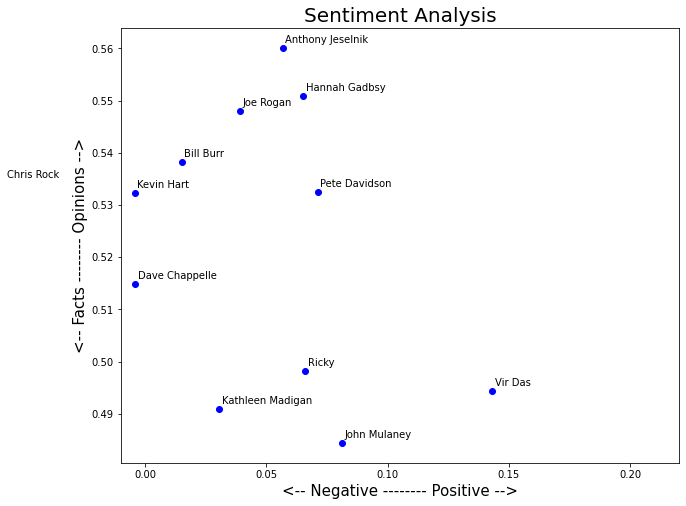

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .22) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.056806,0.560134
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.015214,0.538279
chris,Ladies and gentlemen… live from the world-famo...,Chris Rock,-0.057830,0.534200
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.004118,0.514873
hannah,The following is the transcript of Hannah Gadb...,Hannah Gadbsy,0.065228,0.550855
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.039042,0.547935
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.081169,0.484393
kathleen,[chattering] [man] Whoo! [chattering] [woman] ...,Kathleen Madigan,0.030582,0.491006
kevin,[heartbeat] [indistinct chatter] [atmospheric ...,Kevin Hart,-0.004271,0.532305
pete,♪ Old lady on my case again ♪ ♪ Told me straig...,Pete Davidson,0.071222,0.532426


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my special in San Francisco. Said, “Why would you do that? That’s the most politically correct city in the world.” Not when I’m on stage, it’s not. I love this place. One of my favorite cities to perform in. It’s a good place to hang out. Got to walk around a little bit today. Saw a baby. Saw a baby locked inside the back of a hot car. So it’s been a great day. Love that. Don’t get me wrong. I’m not a monster. I tried to help the baby. Tried to throw a rock through the window. Window was down. Ruined that baby’s whole weekend. It was worth it. I love San Francisco. One of my favorite things is how beautiful all the women are here. Yeah. Women in San Francisco are gorgeous. I say that despite what’s… going on in this crowd tonight. But you guys live here. You guys live here. You’ve seen ’em. I was in a bar last night, saw this beautiful woman. 

In [ ]:
# The list has 12 elements, one for each transcript
len(list_pieces)

12

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.14379144175440475,
  -0.08791172595520422,
  -0.018946837994457046,
  0.02300964187327824,
  0.13712667803576895,
  0.14103930461073316,
  0.07188888888888889,
  0.01005234718000675,
  0.047098364598364605,
  0.07474947891614557],
 [-0.032260689190037016,
  0.003301963736746346,
  0.041578921657046665,
  0.014611938286180702,
  -0.05097013552895906,
  0.10209224165856819,
  0.02132235469945553,
  -0.031014714145245106,
  -0.027377965523126827,
  0.10599917640011987],
 [-0.1102756694964487,
  -0.049900793650793654,
  0.026004273504273485,
  -0.04143255265472732,
  -0.09699607683982686,
  -0.22092507253797566,
  -0.010967696737786008,
  -0.01761233101693629,
  0.011388011388011385,
  -0.030993056282874822],
 [-0.05093449586407334,
  -0.075557111917789,
  0.05736373475009839,
  0.04673358213950997,
  0.00046493721866856856,
  0.08436975722690004,
  -0.13032021268873403,
  -0.09308660933660934,
  -0.04851963512677798,
  0.18474056603773586],
 [0.1325119752042829,
  0.027178671637004957

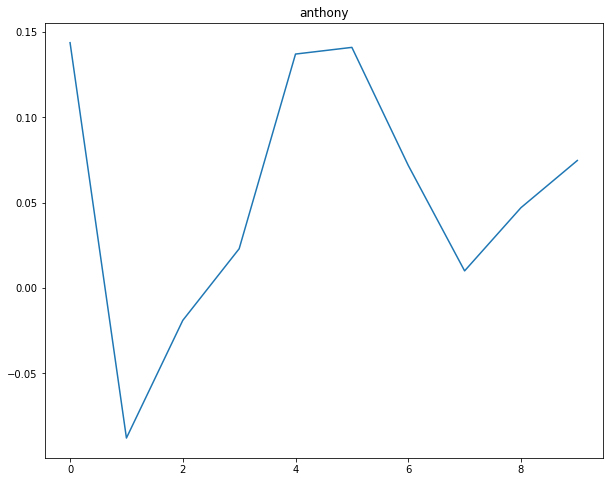

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

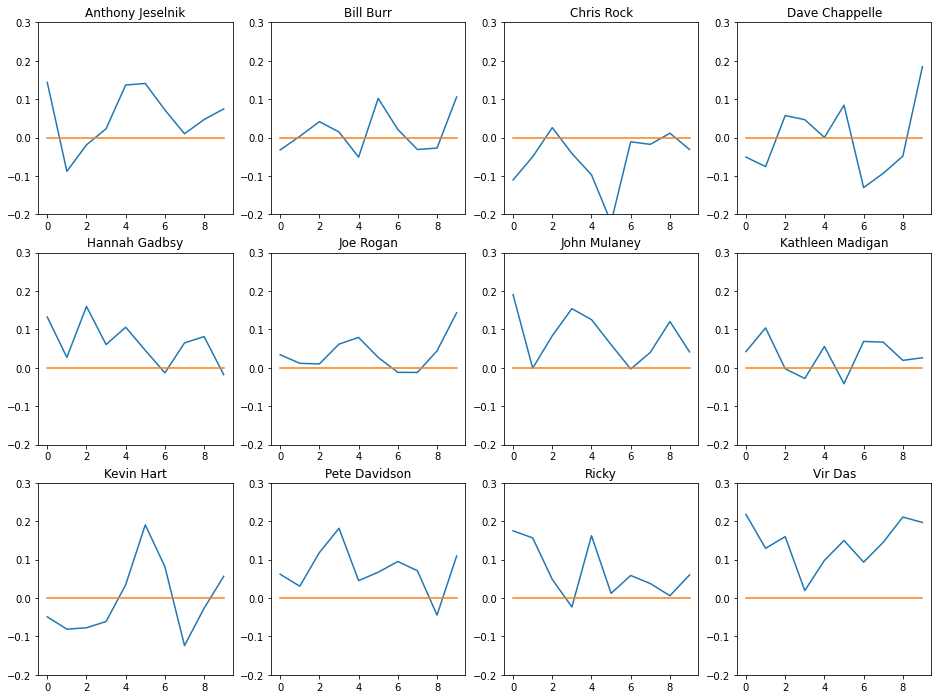

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [ ]:
# Split each routine into 15 parts
import numpy as np
import math

def split_text(text, n=15):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.056806,0.560134
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.015214,0.538279
chris,Ladies and gentlemen… live from the world-famo...,Chris Rock,-0.057830,0.534200
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.004118,0.514873
hannah,The following is the transcript of Hannah Gadb...,Hannah Gadbsy,0.065228,0.550855
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.039042,0.547935
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.081169,0.484393
kathleen,[chattering] [man] Whoo! [chattering] [woman] ...,Kathleen Madigan,0.030582,0.491006
kevin,[heartbeat] [indistinct chatter] [atmospheric ...,Kevin Hart,-0.004271,0.532305
pete,♪ Old lady on my case again ♪ ♪ Told me straig...,Pete Davidson,0.071222,0.532426


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my special in San Francisco. Said, “Why would you do that? That’s the most politically correct city in the world.” Not when I’m on stage, it’s not. I love this place. One of my favorite cities to perform in. It’s a good place to hang out. Got to walk around a little bit today. Saw a baby. Saw a baby locked inside the back of a hot car. So it’s been a great day. Love that. Don’t get me wrong. I’m not a monster. I tried to help the baby. Tried to throw a rock through the window. Window was down. Ruined that baby’s whole weekend. It was worth it. I love San Francisco. One of my favorite things is how beautiful all the women are here. Yeah. Women in San Francisco are gorgeous. I say that despite what’s… going on in this crowd tonight. But you guys live here. You guys live here. You’ve seen ’em. I was in a bar last night, saw this beautiful woman. 

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.28201356421356416,
  -0.04252584150543335,
  -0.1261904761904762,
  -0.0721230158730159,
  0.09471153846153853,
  0.02894119769119769,
  0.17350058334100887,
  0.050744047619047626,
  0.18456065759637189,
  -0.02513824884792627,
  0.14165584415584417,
  -0.006710600907029486,
  -0.015615079365079354,
  0.04894660894660894,
  0.17003667628667626],
 [0.004025597122612046,
  -0.07601887601887607,
  0.041930670339761215,
  0.04615298180871952,
  0.0008909331409331375,
  0.03593344155844154,
  -0.013374882255090592,
  -0.015620291902071573,
  0.09696629859673338,
  0.00860271507592935,
  -0.03023639828738513,
  0.008444940476190467,
  -0.03473214285714287,
  0.10083517903285343,
  0.029901769450949783],
 [-0.07448902288188002,
  -0.11005504352278546,
  -0.04214420231369385,
  -0.018106312292358817,
  0.07192239858906523,
  -0.07584470147907653,
  -0.0598721590909091,
  -0.15920957524791104,
  -0.24637268052761005,
  0.04282538436526925,
  -0.04903517684129929,
  -0.06664034661483641,
  

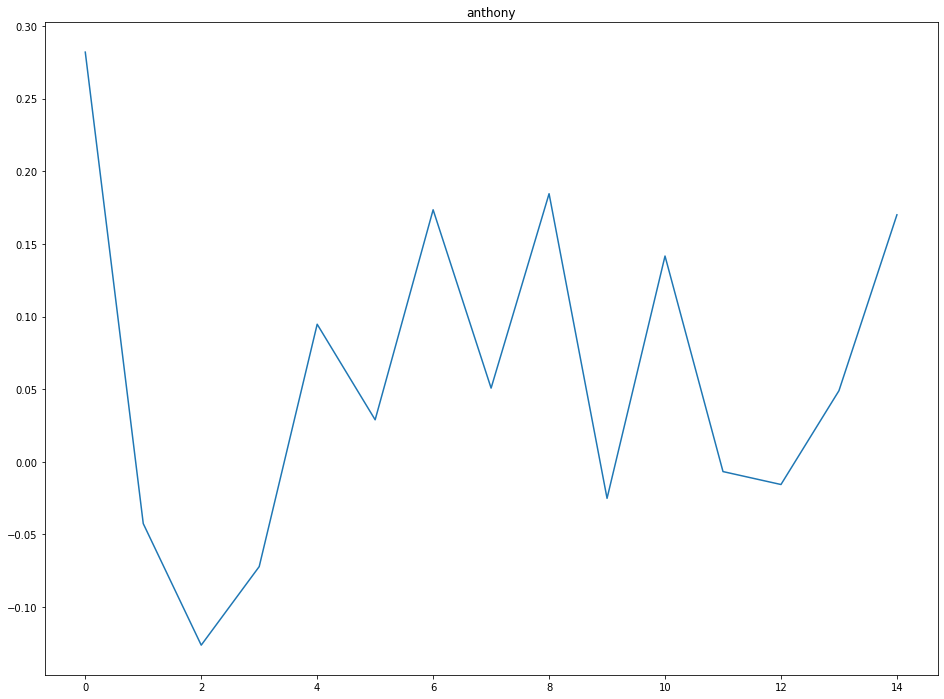

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

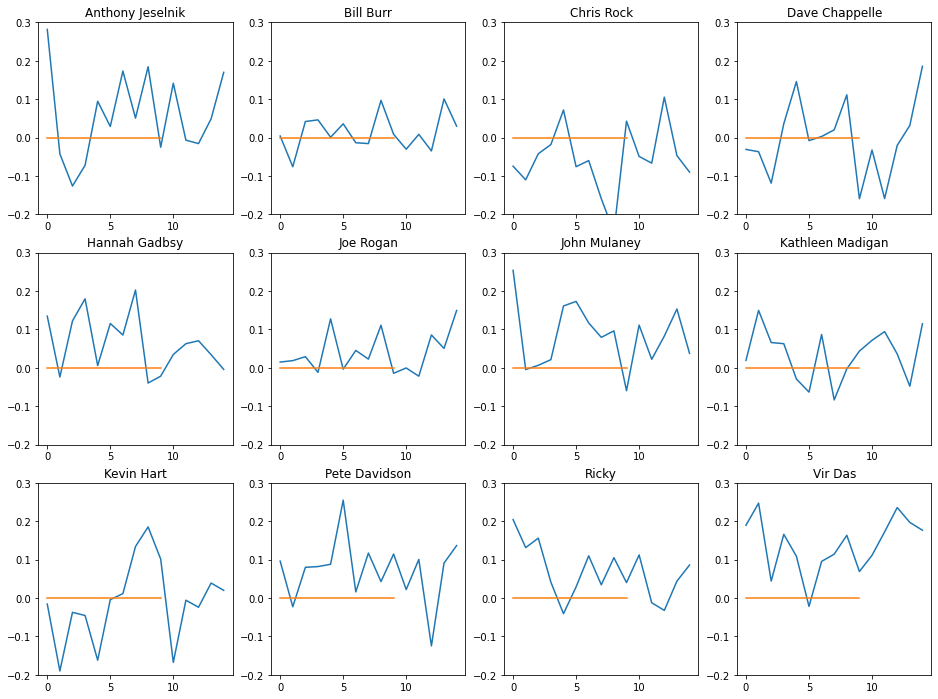

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [ ]:
# Split each routine into 20 parts
import numpy as np
import math

def split_text(text, n=20):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.056806,0.560134
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.015214,0.538279
chris,Ladies and gentlemen… live from the world-famo...,Chris Rock,-0.057830,0.534200
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.004118,0.514873
hannah,The following is the transcript of Hannah Gadb...,Hannah Gadbsy,0.065228,0.550855
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.039042,0.547935
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.081169,0.484393
kathleen,[chattering] [man] Whoo! [chattering] [woman] ...,Kathleen Madigan,0.030582,0.491006
kevin,[heartbeat] [indistinct chatter] [atmospheric ...,Kevin Hart,-0.004271,0.532305
pete,♪ Old lady on my case again ♪ ♪ Told me straig...,Pete Davidson,0.071222,0.532426


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my special in San Francisco. Said, “Why would you do that? That’s the most politically correct city in the world.” Not when I’m on stage, it’s not. I love this place. One of my favorite cities to perform in. It’s a good place to hang out. Got to walk around a little bit today. Saw a baby. Saw a baby locked inside the back of a hot car. So it’s been a great day. Love that. Don’t get me wrong. I’m not a monster. I tried to help the baby. Tried to throw a rock through the window. Window was down. Ruined that baby’s whole weekend. It was worth it. I love San Francisco. One of my favorite things is how beautiful all the women are here. Yeah. Women in San Francisco are gorgeous. I say that despite what’s… going on in this crowd tonight. But you guys live here. You guys live here. You’ve seen ’em. I was in a bar last night, saw this beautiful woman. 

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.2678294552669553,
  0.022778745644599308,
  0.0007617382617382626,
  -0.1415282392026578,
  -0.11237129987129986,
  0.1140033577533578,
  0.09250000000000003,
  -0.0166991341991342,
  0.1213265467171717,
  0.15199738986503694,
  0.12367511520737327,
  0.15786086309523806,
  0.020031055900621115,
  0.12610389610389608,
  0.04175465838509316,
  -0.020329034391534394,
  -0.07375478927203064,
  0.1601545407997021,
  0.01528379028379027,
  0.12678195646945647],
 [0.01614895152129194,
  -0.08282186948853615,
  -0.0056266287609571175,
  0.012416576479076492,
  0.008330053784599225,
  0.06971257908757908,
  0.026322150072150066,
  -2.5826446280990956e-05,
  -0.03311499737636102,
  -0.07186444613306318,
  0.07250496031746033,
  0.13049603174603175,
  -0.03688626580575735,
  0.0785608315295815,
  -0.04059491282851936,
  -0.025766417678182392,
  -0.034228896103896116,
  -0.015087301587301592,
  0.2066269841269842,
  -0.02525448585231194],
 [-0.06537172971955581,
  -0.16947089947089952,
  -0.0

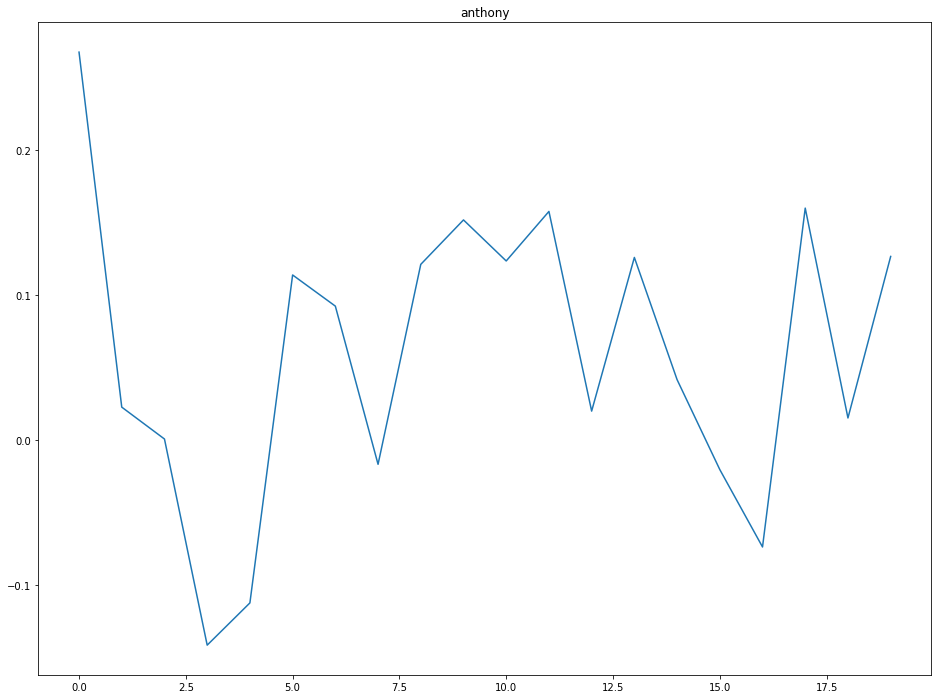

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

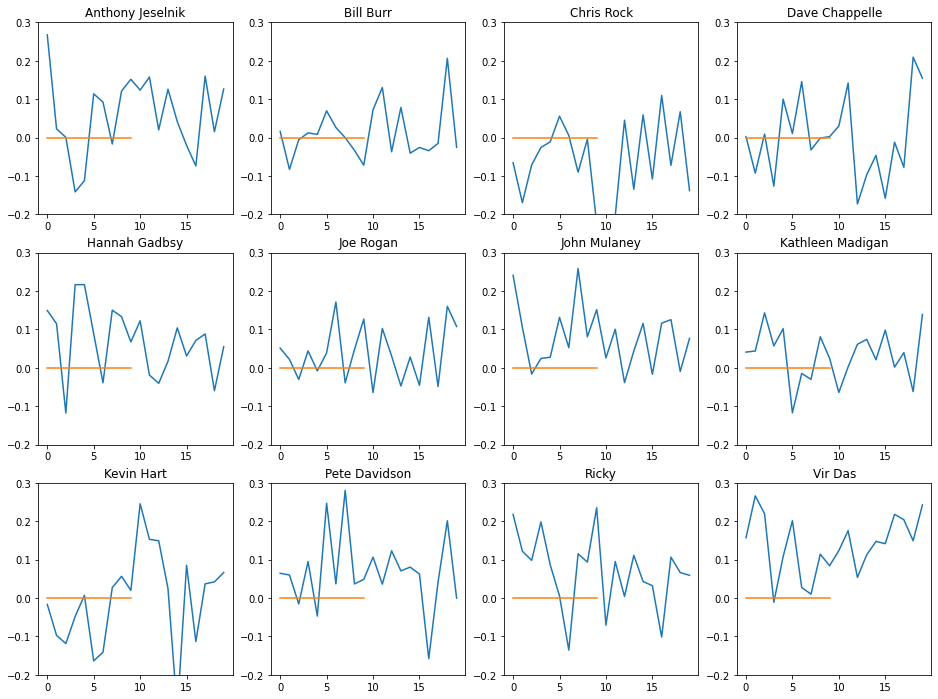

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [ ]:
# On Increasing the number of splits, polarity is found to be more negative for almost every comedian.

In [ ]:
# Split each routine into 5 parts
import numpy as np
import math

def split_text(text, n=5):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.056806,0.560134
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.015214,0.538279
chris,Ladies and gentlemen… live from the world-famo...,Chris Rock,-0.057830,0.534200
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.004118,0.514873
hannah,The following is the transcript of Hannah Gadb...,Hannah Gadbsy,0.065228,0.550855
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.039042,0.547935
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.081169,0.484393
kathleen,[chattering] [man] Whoo! [chattering] [woman] ...,Kathleen Madigan,0.030582,0.491006
kevin,[heartbeat] [indistinct chatter] [atmospheric ...,Kevin Hart,-0.004271,0.532305
pete,♪ Old lady on my case again ♪ ♪ Told me straig...,Pete Davidson,0.071222,0.532426


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.03879998450468254,
  0.0006091483845721115,
  0.13903749566540263,
  0.04029848171152516,
  0.05894884216312787],
 [-0.012503659786268502,
  0.027887991637991633,
  0.02403042929292929,
  -0.004169407280937461,
  0.04366714525005982],
 [-0.07616557014862096,
  -0.009668830188531293,
  -0.17071422185519292,
  -0.013869950790748204,
  -0.007932769461951454],
 [-0.06333189695405606,
  0.051790087165087186,
  0.04878986519809303,
  -0.11265811879093131,
  0.05199085805793122],
 [0.08364600963183436,
  0.10761171236171238,
  0.07158025359414248,
  0.02398072078320697,
  0.03525802619921133],
 [0.021757071576348683,
  0.03401758955330384,
  0.0563097628609677,
  -0.011917135141093462,
  0.09079330213028668],
 [0.0954648705745198,
  0.11554757199322419,
  0.095651850691047,
  0.016882784613047774,
  0.09032033161584795],
 [0.07144438894438893,
  -0.017879407239347,
  0.013223615464994775,
  0.06795477801374027,
  0.022577606992163962],
 [-0.06386281549455199,
  -0.07019387309119447,
  0.1

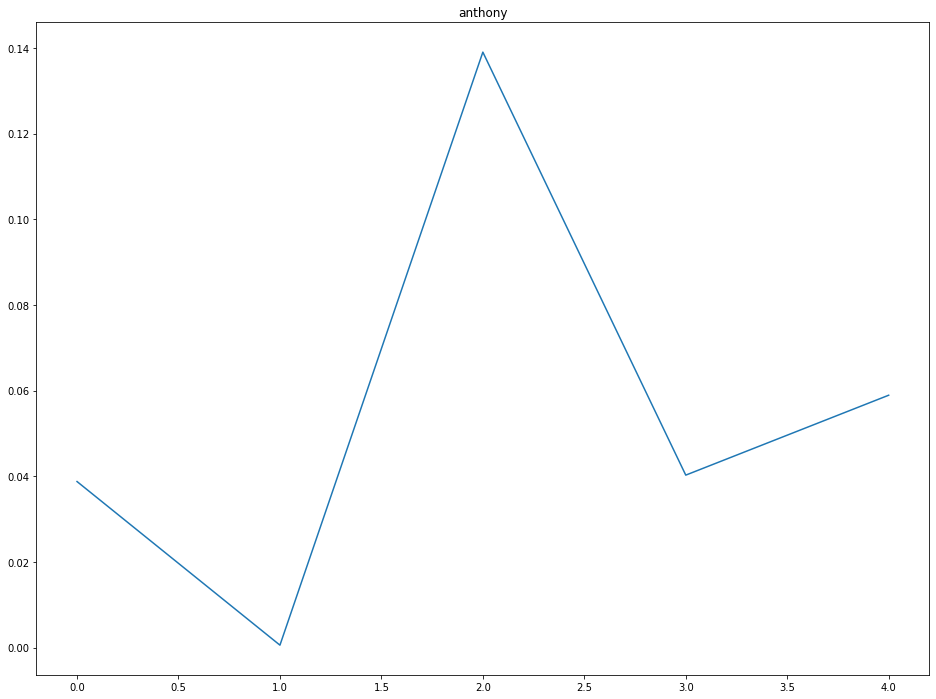

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

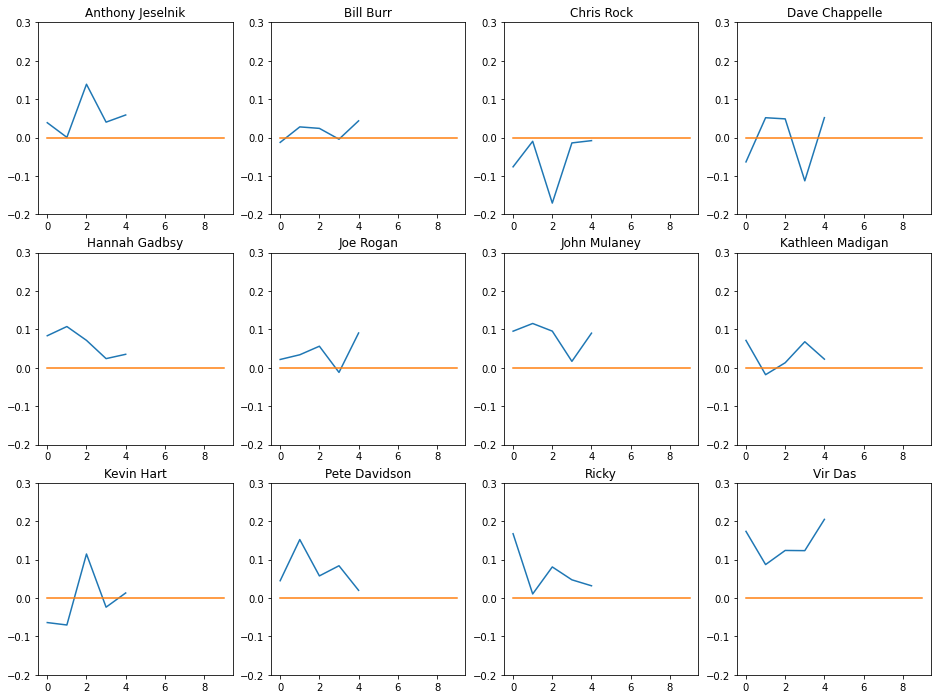

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [ ]:
# Split each routine into 3 parts
import numpy as np
import math

def split_text(text, n=5):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
data

,transcript,full_name,polarity,subjectivity
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.056806,0.560134
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.015214,0.538279
chris,Ladies and gentlemen… live from the world-famo...,Chris Rock,-0.057830,0.534200
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.004118,0.514873
hannah,The following is the transcript of Hannah Gadb...,Hannah Gadbsy,0.065228,0.550855
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.039042,0.547935
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.081169,0.484393
kathleen,[chattering] [man] Whoo! [chattering] [woman] ...,Kathleen Madigan,0.030582,0.491006
kevin,[heartbeat] [indistinct chatter] [atmospheric ...,Kevin Hart,-0.004271,0.532305
pete,♪ Old lady on my case again ♪ ♪ Told me straig...,Pete Davidson,0.071222,0.532426


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.03879998450468254,
  0.0006091483845721115,
  0.13903749566540263,
  0.04029848171152516,
  0.05894884216312787],
 [-0.012503659786268502,
  0.027887991637991633,
  0.02403042929292929,
  -0.004169407280937461,
  0.04366714525005982],
 [-0.07616557014862096,
  -0.009668830188531293,
  -0.17071422185519292,
  -0.013869950790748204,
  -0.007932769461951454],
 [-0.06333189695405606,
  0.051790087165087186,
  0.04878986519809303,
  -0.11265811879093131,
  0.05199085805793122],
 [0.08364600963183436,
  0.10761171236171238,
  0.07158025359414248,
  0.02398072078320697,
  0.03525802619921133],
 [0.021757071576348683,
  0.03401758955330384,
  0.0563097628609677,
  -0.011917135141093462,
  0.09079330213028668],
 [0.0954648705745198,
  0.11554757199322419,
  0.095651850691047,
  0.016882784613047774,
  0.09032033161584795],
 [0.07144438894438893,
  -0.017879407239347,
  0.013223615464994775,
  0.06795477801374027,
  0.022577606992163962],
 [-0.06386281549455199,
  -0.07019387309119447,
  0.1

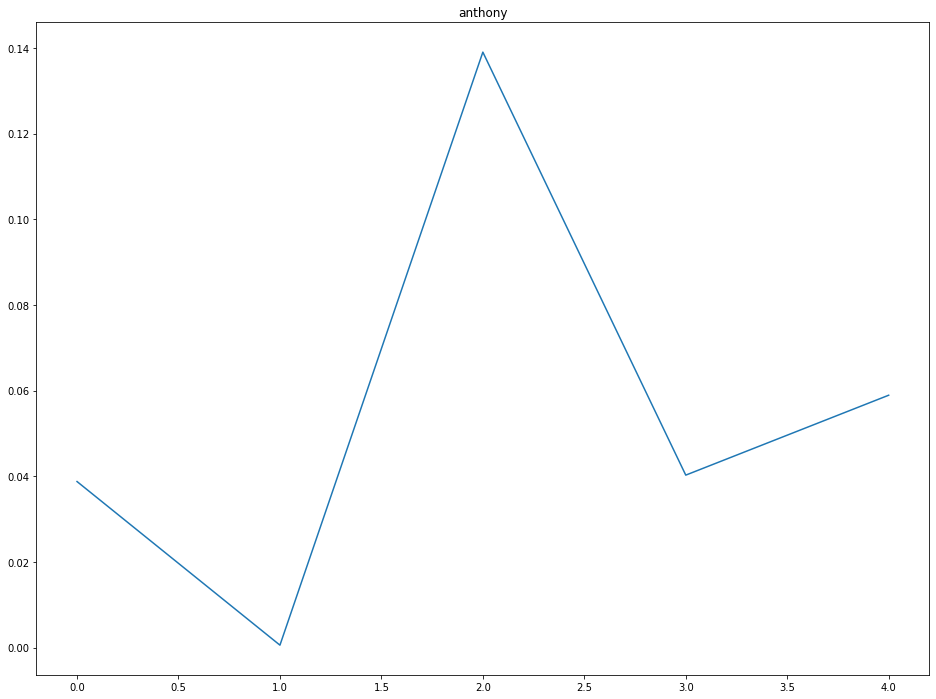

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

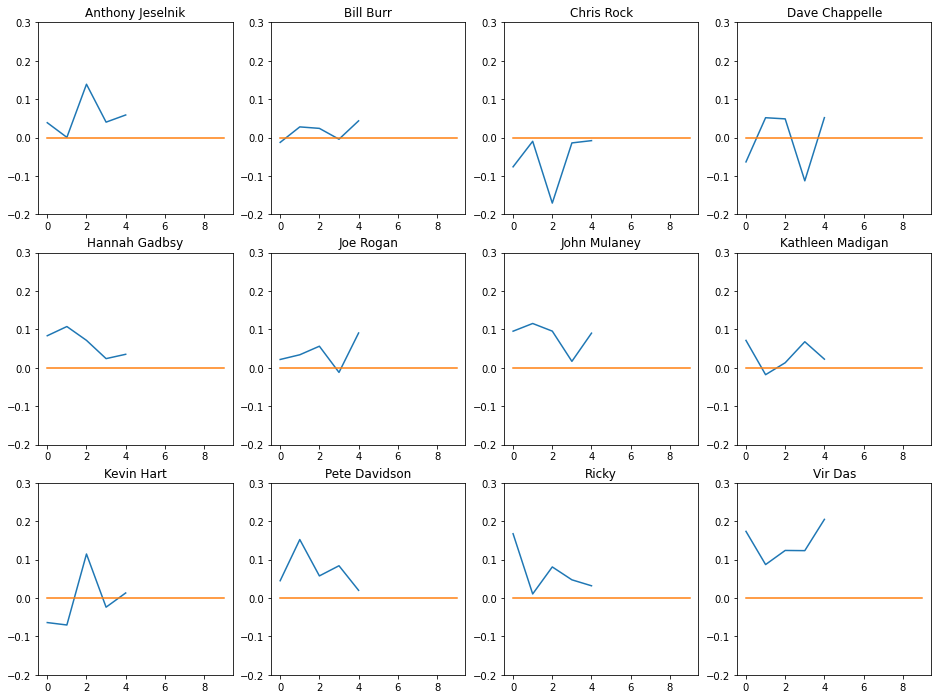

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [ ]:
# On Decreasing the number of splits, polarity is found to be more positive for almost every comedian.